<a href="https://colab.research.google.com/github/RudraKhare/DeepLearning/blob/main/International_Graduate_Admission_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [41]:
#df=pd.read_csv("/content/Admission_Predict.csv")

In [49]:
df=pd.read_csv("/content/Admission_Predict_Ver1.1.csv")

In [50]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [51]:
df.duplicated().sum=()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [53]:
 df.drop(columns=['Serial No.'],inplace=True)

In [54]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [57]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [59]:
 from sklearn.preprocessing import MinMaxScaler
 scaler=MinMaxScaler()

In [62]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [63]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [77]:
model= Sequential()
model.add(Dense(7,activation='relu',input_dim=7))#hidden layer
model.add(Dense(7,activation='relu',input_dim=7))#hidden layer
model.add(Dense(7,activation='relu',input_dim=7))#hidden layer
model.add(Dense(1,activation='linear'))#output layer; In case of regression problme activation functionis always liner

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dense_7 (Dense)             (None, 1)                 8         
                                                                 
Total params: 176 (704.00 Byte)
Trainable params: 176 (704.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [97]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [98]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [99]:
from sklearn .metrics import r2_score
r2_score(y_test,y_pred)

0.7879520275735823

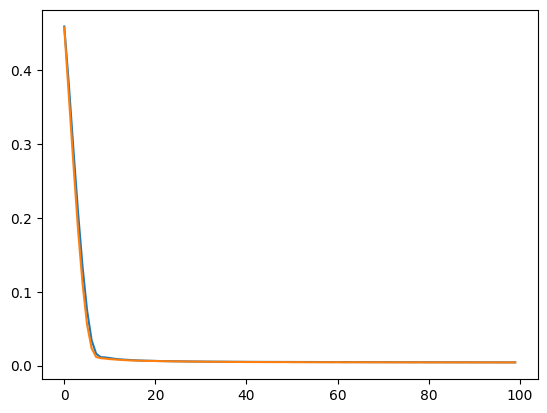

In [100]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])